# Credit Card Analysis

In [3]:
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns

In [4]:
input_path = 'C://projects//alabs_python//date//input//Case Study 2 - Credit Card Case Study//'
file_name1 = 'Customer Acqusition.csv'
file_name2 = 'Repayment.csv'
file_name3 = 'spend.csv'

In [5]:
customer = pd.read_csv(filepath_or_buffer=input_path+file_name1)
repay = pd.read_csv(filepath_or_buffer=input_path+file_name2)
spend = pd.read_csv(filepath_or_buffer=input_path+file_name3)

# Metadata inspection 

In [7]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [8]:
customer.shape

(100, 8)

In [9]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [10]:
customer.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [19]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [23]:
repay.shape

(1523, 5)

In [27]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [29]:
repay.columns

Index(['SL No:', 'Customer', 'Month', 'Amount', 'Unnamed: 4'], dtype='object')

In [47]:
repay.isna().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [33]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [41]:
spend.shape

(1500, 5)

In [37]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [39]:
spend.columns

Index(['Sl No:', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')

In [55]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In case age is less than 18, replace it with mean of age values.

In [19]:
customer.loc[customer['Age'] < 18]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,63,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [17]:
customer.Age.mean()

46.49

In [21]:
# In case age is less than 18, replace it with mean of age values.
customer['Age'] = customer['Age'].apply(lambda x: customer.Age.mean() if x < 18 else x) 

In [25]:
customer.loc[customer['Age'] < 18]

,No,Customer,Age,City,Product,Limit,Company,Segment


Joining the Customer and Spend Tables

In [57]:
a = pd.merge(left=customer, right=spend, left_on='Customer', right_on='Customer')

In [59]:
a.shape

(1500, 12)

In [61]:
a.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount'],
      dtype='object')

Spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [63]:
a.loc[a['Limit'] <= a['Amount'], ['Limit','Amount']]

,Limit,Amount
18,100000.0,199554.72
19,100000.0,376887.49
20,100000.0,439648.53
21,100000.0,384078.73
22,100000.0,117089.16
...,...,...
1486,100003.0,483886.62
1496,10000.0,139018.26
1497,10001.0,284521.06
1498,10002.0,90184.22


In [65]:
a.Limit * 0.5

0       250000.0
1       250000.0
2       250000.0
3       250000.0
4       250000.0
          ...   
1495     50000.0
1496      5000.0
1497      5000.5
1498      5001.0
1499     50000.0
Name: Limit, Length: 1500, dtype: float64

In [67]:
a['Amount'] = a.apply(lambda x: x['Limit'] * 0.5 if x['Amount'] > x['Limit'] else x['Amount'], axis=1)

In [69]:
a[a['Limit'] <= a['Amount']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


Joining the Customer and Repayment Tables

In [71]:
b = pd.merge(left=customer, right=repay, left_on='Customer', right_on='Customer')

In [73]:
b.shape

(1500, 12)

In [75]:
b.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'SL No:', 'Month', 'Amount', 'Unnamed: 4'],
      dtype='object')

The repayment amount is more than the limit, replace the repayment with the 
limit.

In [77]:
b[b['Limit'] < b['Amount']].head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104.0,3-Jan-04,185955.07,NaN
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118.0,28-Feb-05,412783.34,NaN
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132.0,6-Apr-04,148038.67,NaN
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146.0,23-Nov-04,179144.68,NaN
23,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,174.0,3-Aug-05,381635.66,NaN


In [79]:
# axis is used to row wise calucation 
b['Amount'] = b.apply(lambda x: x['Limit'] if x['Amount'] > x['Limit'] else x['Amount'], axis = 1)

In [81]:
b[b['Limit'] < b['Amount']]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4


 Distinct customers

In [83]:
customer['Customer'].unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29',
       'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38',
       'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47',
       'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56',
       'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65',
       'A66', 'A67', 'A68', 'A69', 'A70', 'A71', 'A72', 'A73', 'A74',
       'A75', 'A76', 'A77', 'A78', 'A79', 'A80', 'A81', 'A82', 'A83',
       'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92',
       'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100'],
      dtype=object)

In [85]:
customer['Customer'].nunique()

100

In [87]:
customer['Product'].unique()

array(['Gold', 'Silver', 'Platimum'], dtype=object)

In [89]:
customer.Segment.unique()

array(['Self Employed', 'Salaried_MNC', 'Salaried_Pvt', 'Govt',
       'Normal Salary'], dtype=object)

In [91]:
customer.City.unique()

array(['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM'], dtype=object)

In [93]:
a.dtypes

No            int64
Customer     object
Age         float64
City         object
Product      object
Limit       float64
Company      object
Segment      object
Sl No:        int64
Month        object
Type         object
Amount      float64
dtype: object

In [95]:
a.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8


In [97]:
a['Month'] = pd.to_datetime(a['Month'], format='%d-%b-%y')

In [99]:
a['Month'].dt.year.unique()

array([2004, 2005, 2006])

In [101]:
a['Month'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: Month, Length: 1500, dtype: int32

The average monthly spend by customers?

In [103]:
a.groupby(by = ['Customer', a['Month'].dt.month])['Amount'].mean().head(10)

Customer  Month
A1        1        372762.587143
          2        175235.690000
          4        261649.250000
          5        361141.310000
          8        344372.100000
          10       244534.680000
          11       183839.610000
A10       1        161144.326667
          2        194557.667500
          3        134631.266667
Name: Amount, dtype: float64

In [105]:
b.dtypes

No              int64
Customer       object
Age           float64
City           object
Product        object
Limit         float64
Company        object
Segment        object
SL No:        float64
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [107]:
b['Month'] = pd.to_datetime(b['Month'], format='%d-%b-%y')

The average monthly repayment by customers

In [109]:
b.groupby(by=['Customer', b['Month'].dt.month])['Amount'].mean().head(10)

Customer  Month
A1        1        343972.327143
          2        156374.760000
          4        254474.580000
          7        297176.740000
          9        186427.500000
          11       285729.090000
A10       1        272897.385000
          2        217344.503333
          3        240130.543333
          4        159582.470000
Name: Amount, dtype: float64

Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts

The top 5 product types

In [111]:
a.groupby(by=['Product'])['Amount'].sum()

Product
Gold        1.462004e+08
Platimum    5.638741e+07
Silver      1.719332e+07
Name: Amount, dtype: float64

 Cities having maximum spend

In [113]:
a.groupby(by=['City'])['Amount'].sum().sort_values(ascending=False)

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

 Which age group is spending more money

In [123]:
a.pivot_table(index='Age', values='Amount', aggfunc=sum).sort_values(by = "Amount", ascending=False)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_24004\1810514897.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  a.pivot_table(index='Age', values='Amount', aggfunc=sum).sort_values(by = "Amount", ascending=False)


,Amount
Age,
28.00,17365270.23
46.49,15872551.38
78.00,12329508.54
37.00,9992645.71
25.00,9749700.72
51.00,9670808.79
47.00,9157809.12
44.00,9002326.39
29.00,8231607.26


Top 10 customers in terms of repayment

In [115]:
b.groupby(by = ['Customer'])['Amount'].sum().sort_values(ascending=False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

Calculate the city wise spend on each product on yearly basis. Also include a graphical 
representation for the same.

In [125]:
cws = a.pivot_table(index='City', columns=a.Month.dt.year, values='Amount', aggfunc=sum)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_24004\3128890225.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cws = a.pivot_table(index='City', columns=a.Month.dt.year, values='Amount', aggfunc=sum)


In [133]:
cws = cws.rename_axis(None, axis=1).reset_index()

In [135]:
cws

,City,2004,2005,2006
0,BANGALORE,11694463.42,14635260.30,14131923.30
1,BOMBAY,8417207.50,10203811.76,9982108.12
2,CALCUTTA,10014837.28,15178199.17,15915095.85
3,CHENNAI,4877327.74,9172086.39,8079221.52
4,COCHIN,11549983.84,17723804.12,16689725.54
5,DELHI,3858180.19,3071314.34,3988792.01
6,PATNA,3942321.60,7085941.03,4232324.34
7,TRIVANDRUM,4786446.99,5111732.14,5438976.74


 Monthly comparison of total spends, city wise

In [167]:
msc = a.pivot_table(index= a['Month'].dt.month, columns='City', values='Amount', aggfunc=sum).reset_index()

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_24004\1825105072.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  msc = a.pivot_table(index= a['Month'].dt.month, columns='City', values='Amount', aggfunc=sum).reset_index()


In [201]:
msc.reset_index(drop=True, inplace=True)

In [197]:
msc.columns.name = None

In [203]:
msc

,Month,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
0,1,9041796.84,5948993.33,9064864.90,4466961.36,11714373.54,2714261.45,4916205.55,3704336.99
1,2,6734494.76,4276988.30,8150545.61,4385815.95,5747886.38,1494064.06,2353333.55,2857123.89
2,3,5362903.07,5227850.50,4939040.04,3183643.71,5645146.53,2267149.02,1437166.61,2392316.51
3,4,4207980.48,1873785.01,3457507.95,2518656.99,3882744.94,777240.75,2338179.53,1199293.45
4,5,6383115.13,3891945.60,5578246.87,2856199.62,6581085.69,1600322.07,2136586.80,2813534.48
5,6,1330685.90,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
6,7,2228217.69,177726.32,2234573.27,693825.77,1290897.30,50001.50,50000.00,260484.50
7,8,695061.95,1066744.75,1548354.02,305875.97,2317306.61,155402.16,419383.64,453773.94
8,9,703018.28,1278402.79,1511713.57,745759.40,1382242.90,50001.00,70329.95,186063.70
9,10,1091602.61,676005.70,196357.83,156247.17,868551.89,64615.46,329537.34,285581.92


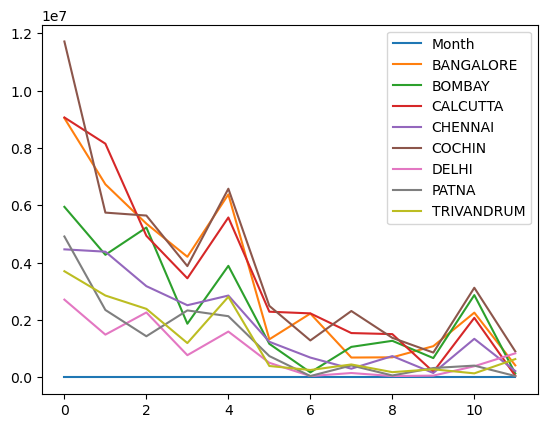

In [223]:
msc.plot(kind='line')
plt.show()

Comparison of yearly spend on air tickets

In [151]:
a[a['Type'] == 'AIR TICKET']

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,2006-04-19,AIR TICKET,346925.68
63,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,275,2006-03-03,AIR TICKET,5001.00
80,6,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,276,2006-04-03,AIR TICKET,50000.00
97,7,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,277,2006-05-03,AIR TICKET,50000.50
115,8,A8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt,278,2006-06-03,AIR TICKET,50001.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1474,75,A75,36.0,BOMBAY,Silver,100003.0,C37,Self Employed,77,2005-02-23,AIR TICKET,50001.50
1475,76,A76,66.0,BANGALORE,Silver,500000.0,C38,Self Employed,78,2005-02-03,AIR TICKET,30066.44
1476,77,A77,35.0,BANGALORE,Silver,500000.0,C39,Self Employed,79,2006-02-04,AIR TICKET,31048.93
1483,84,A84,70.0,PATNA,Silver,100000.0,C7,Govt,86,2006-03-27,AIR TICKET,50000.00


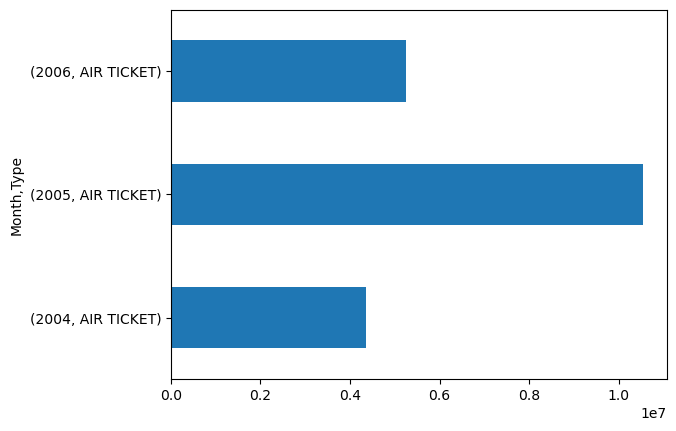

In [213]:
a[a['Type'] == 'AIR TICKET'].groupby(by = [a['Month'].dt.year,'Type'])['Amount'].sum().plot(kind = 'barh')
plt.show()

 Comparison of monthly spend for each product (look for any seasonality
 that exists in terms of spend)

In [189]:
mps = a.pivot_table(index=a.Month.dt.month, columns='Product', values='Amount', aggfunc=sum).reset_index()

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_24004\450962286.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mps = a.pivot_table(index=a.Month.dt.month, columns='Product', values='Amount', aggfunc=sum).reset_index()


In [191]:
mps

Product,Month,Gold,Platimum,Silver
0,1,32413831.83,14951578.51,4206383.62
1,2,24779179.55,9134054.58,2087018.37
2,3,19256972.48,7288837.68,3909405.83
3,4,13170572.59,5182493.86,1902322.65
4,5,21548169.76,8151926.49,2140940.01
5,6,6538862.64,2965712.71,689537.61
6,7,5167416.37,1288156.26,530153.72
7,8,4954030.42,1714762.80,293109.82
8,9,3816887.62,1667840.84,442803.13
9,10,3018223.38,550275.04,100001.50


In [205]:
mps.columns_name = None

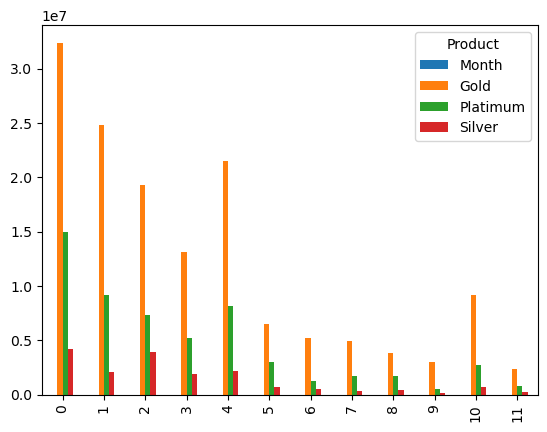

In [207]:
mps.plot(kind='bar')
plt.show()